Name: Shravani Sai Ventrapragada

PRN:17070123120

Batch: G-5 (2017-21)

Convert this to LetNet Architecture 

Design with 
2 conv layer (32 and 64) filters 
Maxpooling (2x2)
Dropout(0.5)
Flatten()
Dense(128)
Dropout(0.5)
Dense(10 with softmax activation)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense  #Fully connected layer 
from keras.layers import Dropout #Neurons get dropped 
from keras.layers.normalization import BatchNormalization 
from keras.optimizers import SGD
from keras import regularizers
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

Load Data

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Flatting the image using reshape with 32 bit precision 
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') 
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
# Matrix range is from 0-255
x_train /= 255
x_test /= 255

In [ ]:
# Every image belonging to one perticular class= 10 
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
Model_new = Sequential()

In [ ]:
Model_new.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1)))
Model_new.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
Model_new.add(MaxPooling2D(pool_size=(2, 2)))
Model_new.add(Dropout(0.5))
Model_new.add(Flatten())
Model_new.add(Dense(128, activation='tanh'))
Model_new.add(Dropout(0.5))
Model_new.add(Dense(10, activation='softmax'))

In [ ]:
Model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
history= Model_new.fit(x_train, y_train, batch_size=64, epochs=2, verbose=1, validation_data=(x_test, y_test))

Epoch 1/2
938/938 [==============================] - 67s 71ms/step - loss: 0.3189 - accuracy: 0.9000 - val_loss: 0.0475 - val_accuracy: 0.9845
Epoch 2/2
938/938 [==============================] - 65s 69ms/step - loss: 0.0779 - accuracy: 0.9762 - val_loss: 0.0427 - val_accuracy: 0.9862


Model Evaluation

Text(0.5, 0, 'epoch')

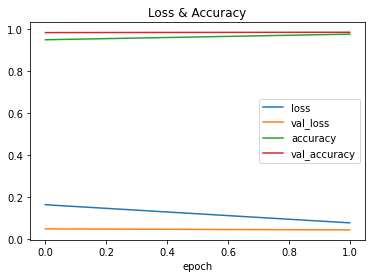

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.title('Loss & Accuracy')
plt.xlabel('epoch')

In [ ]:
score = Model_new.evaluate(x_test, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0427 - accuracy: 0.9862
Test Score 0.04266047105193138
Test Accuracy 0.9861999750137329


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('LetNet.ipynb')

--2021-05-26 03:54:38--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1865 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-05-26 03:54:38 (32.5 MB/s) - ‘colab_pdf.py’ saved [1865/1865]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/LetNet.ipynb to pdf
[NbConvertApp] Support files will be in LetNet_files/
[NbConvertApp] Making directory ./LetNet_files
[NbConvertApp] Writing 35120 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-qu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'